In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
import os
import re
import pickle
from IPython.display import clear_output

In [3]:
funded_R01_projects_category = pd.DataFrame()
for root, dirs, files in os.walk("data/funded_R01_projects_category_dfs/", topdown=True):
    for file in files:
        df = pd.read_csv(os.path.join(root, file))
        funded_R01_projects_category = funded_R01_projects_category.append(df)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,19,24,33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,11,12,15,17,19,24,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
funded_R01_projects_category.head()

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num,category,probability
0,7499670,NaN,2008-09-12T00:00:00,08/31/2009,09/01/2008,389.0,U24RR018107,NaN,SCHOOLS OF MEDICINE,NaN,...,ESTABLISHMENT OF SPECIFIC PATHOGEN FREE RHESUS...,RIRG,NaN,NaN,741430.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018107,Tuberculosis,1.000000
1,7495989,NaN,2008-09-16T00:00:00,06/30/2009,09/01/2008,389.0,U24RR018108,NaN,UNIVERSITY-WIDE,NaN,...,ENHANCEMENT OF THE CPRC-SPF RHESUS MONKEY PROGRAM,RIRG,NaN,NaN,1811959.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018108,Tuberculosis,0.999931
2,7502303,NaN,2008-09-01T00:00:00,06/30/2009,09/01/2008,389.0,U24RR018109,NaN,PRIMATE CENTERS,NaN,...,SPF Breeding Colonies at the Yerkes NPRC,RIRG,NaN,A1,1431792.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018109,Tuberculosis,0.999549
3,7501548,NaN,2008-06-30T00:00:00,06/30/2009,07/01/2008,389.0,U24RR018111,NaN,PRIMATE CENTERS,NaN,...,Establishment and Expansion of SPF Rhesus Colony,RIRG,NaN,A1,1908805.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018111,Tuberculosis,1.000000
4,7439671,NaN,2008-08-16T00:00:00,05/31/2009,08/18/2008,389.0,U24RR018144,NaN,PRIMATE CENTERS,NaN,...,Genetically Defined Herpes/Retrovirus SPF Maca...,RIRG,NaN,NaN,2067808.0,NaN,[unreadable] DESCRIPTION (provided by applic...,U24RR018144,Tuberculosis,0.999975


In [4]:
nih_budget = pd.read_csv("data/nih_budget.csv")
brdpi = pd.read_excel("data/BRDPI Table FY 1950 to 2023_Jan 2018_Rev.xlsx", skiprows = [0, 1, 2], skip_footer = 10)

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/pandas/util/_decorators.py:178: FutureWarning: the 'skip_footer' keyword is deprecated, use 'skipfooter' instead
  return func(*args, **kwargs)


In [56]:
nih_budget.head()

,FY,NCI,NHLBI,NIDCR,NIDDK,NINDS,NIAID,NIGMS,NICHD,NEI,...,NIMHD,NCRR,NCCAM,NCATS,FIC,NLM,OD,B&F,OAR,Total
0,1938,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464
1,1939,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464
2,1940,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707
3,1941,570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711
4,1942,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700


In [55]:
brdpi

,Year,Annual Change,1950,1951,1952,1953,1954,1955,1956,1957,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,1950,NaN,100.000000,93.946261,91.200503,89.512647,88.502592,87.251954,84.903452,81.884876,...,7.555478,7.340579,7.123940,6.925793,6.838196,6.712471,6.571255,6.440260,6.303228,6.143408
1,1951,0.064438,106.443832,100.000000,97.077310,95.280691,94.205550,92.874324,90.374488,87.161400,...,8.042341,7.813594,7.582995,7.582995,7.278838,7.145012,6.994696,6.855260,6.709398,6.539279
2,1952,0.030107,109.648518,103.010683,100.000000,98.149291,97.041781,95.670475,93.095377,89.785553,...,8.284470,8.048836,7.811295,7.811295,7.497981,7.360126,7.205284,7.061650,6.911396,6.736156
3,1953,0.018856,111.716058,104.953059,101.885607,100.000000,98.871607,97.474444,94.850790,91.478555,...,8.440682,8.200606,7.958585,7.958585,7.639363,7.498909,7.341147,7.194805,7.041718,6.863173
4,1954,0.011413,112.991041,106.150858,103.048397,101.141271,100.000000,98.586891,95.933294,92.522573,...,8.537014,8.294197,8.049414,8.049414,7.726549,7.584491,7.424930,7.276917,7.122083,6.941501
5,1955,0.014334,114.610613,107.672386,104.525456,102.590993,101.433364,100.000000,97.308367,93.848758,...,8.659380,8.413083,8.164792,8.164792,7.837298,7.693205,7.531356,7.381222,7.224168,7.040998
6,1956,0.027661,117.780841,110.650696,107.416719,105.428748,104.239097,102.766085,100.000000,96.444695,...,8.898906,8.645796,8.390637,8.390637,8.054085,7.906005,7.739680,7.585393,7.423995,7.235758
7,1957,0.036864,122.122674,114.729686,111.376493,109.315238,108.081732,106.554420,103.686366,100.000000,...,9.226952,8.964512,8.699946,8.699946,8.350988,8.197450,8.024993,7.865018,7.697671,7.502494
8,1958,0.024266,125.086147,117.513758,114.079195,111.967921,110.704483,109.140108,106.202458,102.426637,...,9.450857,9.182048,8.911062,8.911062,8.553636,8.396372,8.219730,8.055874,7.884465,7.684553
9,1959,0.019559,127.532736,119.812237,116.310497,114.157927,112.869777,111.274805,108.279696,104.430023,...,9.635708,9.361642,9.085356,9.085356,8.720939,8.560599,8.380502,8.213440,8.038679,7.834856


In [54]:
brdpi[1950][:-7]

0      100.000000
1      106.443832
2      109.648518
3      111.716058
4      112.991041
5      114.610613
6      117.780841
7      122.122674
8      125.086147
9      127.532736
10     130.186079
11     132.977257
12     136.009649
13     139.731220
14     142.763611
15     147.036527
16     152.343212
17     159.028256
18     166.574776
19     175.499655
20     186.492074
21     197.312198
22     207.133012
23     217.022743
24     230.840799
25     255.513439
26     274.569263
27     296.450724
28     318.401103
29     344.855065
         ...     
37     591.743984
38     621.409403
39     653.698581
40     689.187767
41     722.445706
42     754.312231
43     780.086281
44     810.283421
45     838.350926
46     859.803298
47     883.720744
48     913.683858
49     942.612116
50     977.738757
51    1010.245697
52    1043.707208
53    1080.394408
54    1120.645828
55    1164.243966
56    1218.142044
57    1264.359344
58    1323.542947
59    1362.290295
60    1403.717543
61    1443

In [4]:
nih_budget_actual_percentages = [100]
counter = 1
annual_budgets = nih_budget.loc[nih_budget.FY >= 1950].Total.tolist()
l = len(annual_budgets)-1
while counter <= l:
    pct_inc = annual_budgets[counter]/annual_budgets[counter-1]
    overall_pct_inc = pct_inc + nih_budget_actual_percentages[-1]
    nih_budget_actual_percentages.append(overall_pct_inc)
    counter += 1

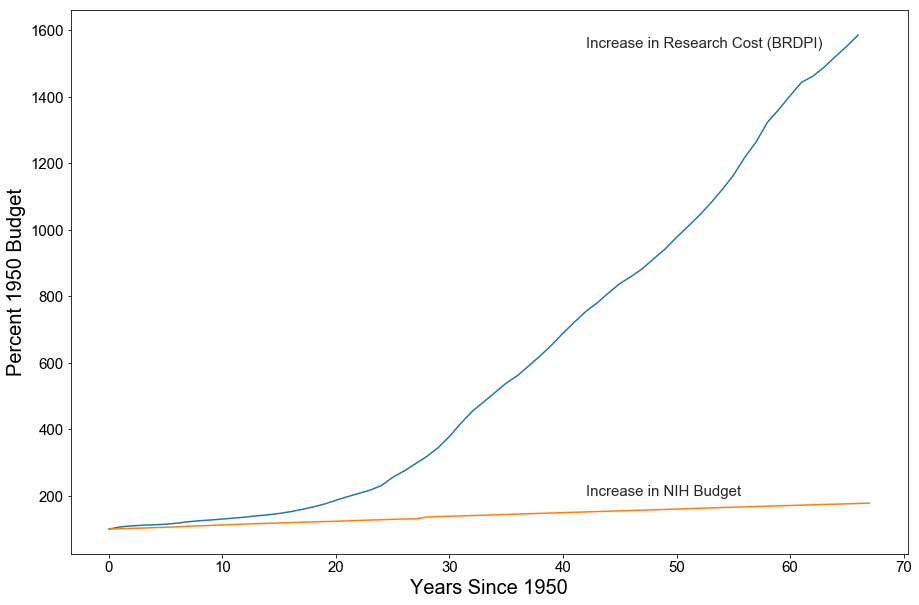

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(brdpi[1950][:-7])
plt.plot(nih_budget_actual_percentages)
plt.xlabel("Years Since 1950", size = 20)
plt.ylabel("Percent 1950 Budget", size = 20)
plt.text(s = "Increase in Research Cost (BRDPI)", x = 42, y = 1550, size = 15)
plt.text(s = "Increase in NIH Budget", x = 42, y = 200, size = 15)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [7]:
R01s_per_year = funded_R01_projects_category.groupby("FY").count()

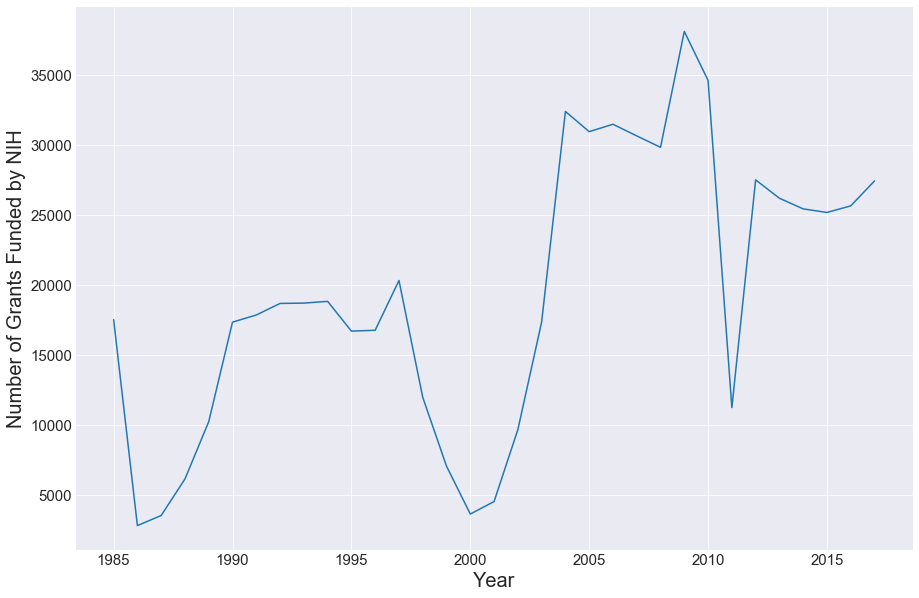

In [8]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [9]:
R01_2009 = funded_R01_projects_category[funded_R01_projects_category.FY == 2009]

In [10]:
R01_2009_categories = R01_2009.category.unique()

In [11]:
len(R01_2009_categories)

171

In [12]:
R01_2009_categories = R01_2009.groupby("category").count()

In [13]:
R01_2009_categories[R01_2009_categories.grant_num == 0]

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_TERMS,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num,probability
category,,,,,,,,,,,,,,,,,,,,,


In [14]:
R01_2000 = funded_R01_projects_category[funded_R01_projects_category.FY == 2000]

In [15]:
R01_2000_categories = R01_2000.category.unique()

In [16]:
len(R01_2000_categories)

162

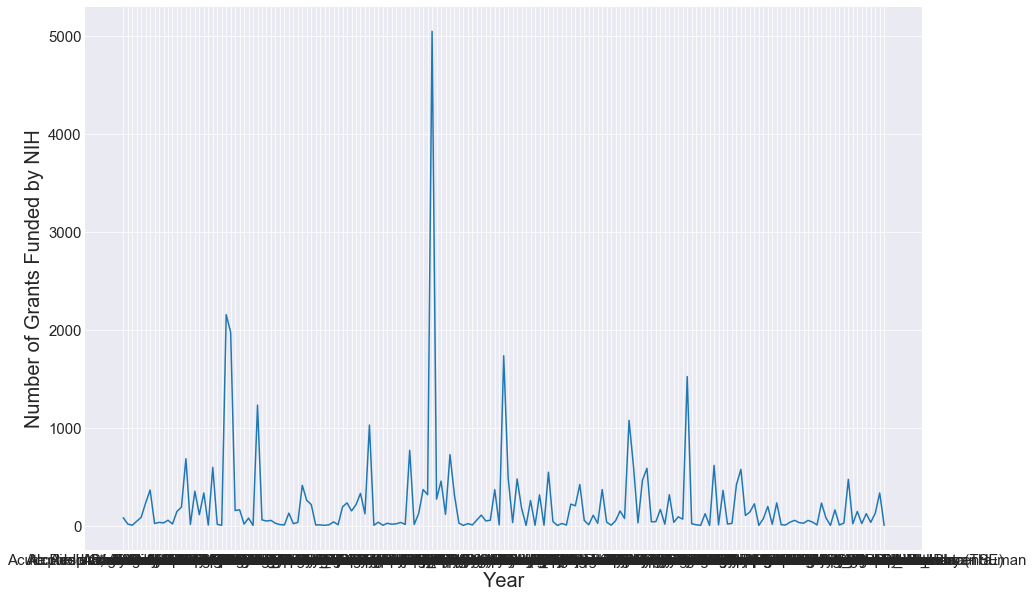

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01_2009_categories["grant_num"])
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [93]:
years = []
categories = []
for year in np.sort(funded_R01_projects_category.FY.unique()):
    df_year = funded_R01_projects_category[funded_R01_projects_category.FY == year]
    num_categories = len(df_year.category.unique())
    categories.append(num_categories)
    years.append(year)

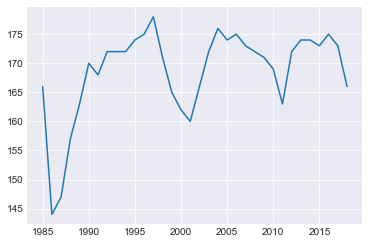

In [94]:
plt.plot(years, categories)

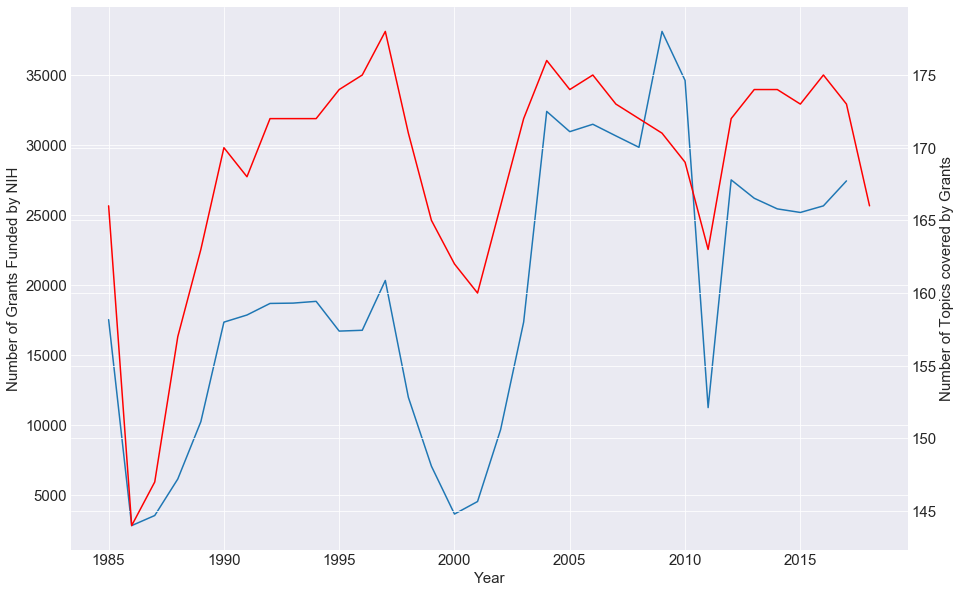

In [20]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(R01s_per_year.loc[R01s_per_year.index != 2018.0]["grant_num"])
ax2.plot(years, categories, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax2.set_ylabel('Number of Topics covered by Grants', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [6]:
nih_budget_1985 = nih_budget[nih_budget.FY >= 1985]
nih_budget_1985.reset_index(drop = True, inplace = True)

In [22]:
fold_change = []
totals = nih_budget_1985.Total.tolist()
l = len(totals)-1
for i in list(range(len(totals))):
    if i != l:
        FC = (totals[i+1] - totals[i])/totals[i]
        fold_change.append(FC)

In [23]:
fold_change

[0.02189589236461539,
 0.1749642878250226,
 0.0782451952236083,
 0.07171051674345887,
 0.06040604554523487,
 0.09217985120015543,
 0.07818349315911959,
 0.1585248395286676,
 0.059963935744557176,
 0.03137511942323064,
 0.055581112192179455,
 0.06818501551280974,
 0.07330755115654435,
 0.1429130118715074,
 0.14149394887350283,
 0.14674231290708092,
 0.1399329454141338,
 0.16488443952421,
 0.032021243643186155,
 0.019892906518319767,
 -0.0011869474805815707,
 0.021641385698255036,
 0.014687730392209278,
 0.031682567711023076,
 0.022684556454852428,
 -0.010296914014981753,
 -0.001792967441655862,
 -0.050066276393054214,
 0.02820425775541958,
 0.07194774793048243,
 0.15474439027599868]

In [24]:
nih_budget_1985.iloc[1]

FY          1986.0
NCI      1203369.0
NHLBI     822292.0
NIDCR      98841.0
NIDDK     544858.0
NINDS     414727.0
NIAID     366964.0
NIGMS     492630.0
NICHD     307958.0
NEI       186705.0
NIEHS     188986.0
NIA       149762.0
NIAMS          NaN
NIDCD          NaN
NIMH           NaN
NIDA           NaN
NIAAA          NaN
NINR           NaN
NHGRI          NaN
NIBIB          NaN
NIMHD          NaN
NCRR      292523.0
NCCAM          NaN
NCATS          NaN
FIC        11054.0
NLM        55322.0
OD        111961.0
B&F        14259.0
OAR            NaN
Total    5262211.0
Name: 1, dtype: float64

In [25]:
nih_budget_1985

,FY,NCI,NHLBI,NIDCR,NIDDK,NINDS,NIAID,NIGMS,NICHD,NEI,...,NIMHD,NCRR,NCCAM,NCATS,FIC,NLM,OD,B&F,OAR,Total
0,1985,1183806,805269.0,100688.0,543576.0,396885.0,370965.0,482260.0,313295.0,181678.0,...,NaN,304025.0,NaN,NaN,11728.0,55910.0,38304.0,21730.0,NaN,5149459
1,1986,1203369,822292.0,98841.0,544858.0,414727.0,366964.0,492630.0,307958.0,186705.0,...,NaN,292523.0,NaN,NaN,11054.0,55322.0,111961.0,14259.0,NaN,5262211
2,1987,1402837,930001.0,117945.0,511124.0,490233.0,545523.0,570916.0,366780.0,216637.0,...,NaN,322860.0,NaN,NaN,11420.0,61838.0,57208.0,31900.0,NaN,6182910
3,1988,1469327,965536.0,126297.0,534733.0,534692.0,638800.0,632676.0,396811.0,224947.0,...,NaN,368153.0,NaN,NaN,15651.0,67910.0,61819.0,47870.0,NaN,6666693
4,1989,1570349,1045509.0,130709.0,559494.0,472292.0,740257.0,682213.0,425375.0,231170.0,...,NaN,358076.0,NaN,NaN,15790.0,73731.0,72076.0,38492.0,NaN,7144765
5,1990,1634332,1072354.0,135749.0,581477.0,490409.0,832977.0,681782.0,442914.0,236533.0,...,NaN,353734.0,NaN,NaN,15516.0,81861.0,107419.0,61042.0,NaN,7576352
6,1991,1714784,1126942.0,148918.0,615272.0,541743.0,906251.0,760010.0,478956.0,253241.0,...,NaN,335255.0,NaN,NaN,17519.0,91408.0,95651.0,168687.0,NaN,8274739
7,1992,1962587,1188593.0,158417.0,658925.0,577938.0,959082.0,816844.0,518251.0,268978.0,...,NaN,314213.0,NaN,NaN,19593.0,99088.0,141854.0,103840.0,NaN,8921687
8,1993,1981351,1214793.0,161301.0,681342.0,600078.0,979471.0,832581.0,527788.0,276188.0,...,NaN,312468.0,NaN,NaN,19733.0,113031.0,190325.0,108731.0,NaN,10335996
9,1994,2082267,1277880.0,169520.0,716054.0,630650.0,1065593.0,875511.0,555195.0,290260.0,...,NaN,331915.0,NaN,NaN,21677.0,119981.0,233605.0,111039.0,NaN,10955783


ValueError: x and y must have same first dimension, but have shapes (34,) and (31,)

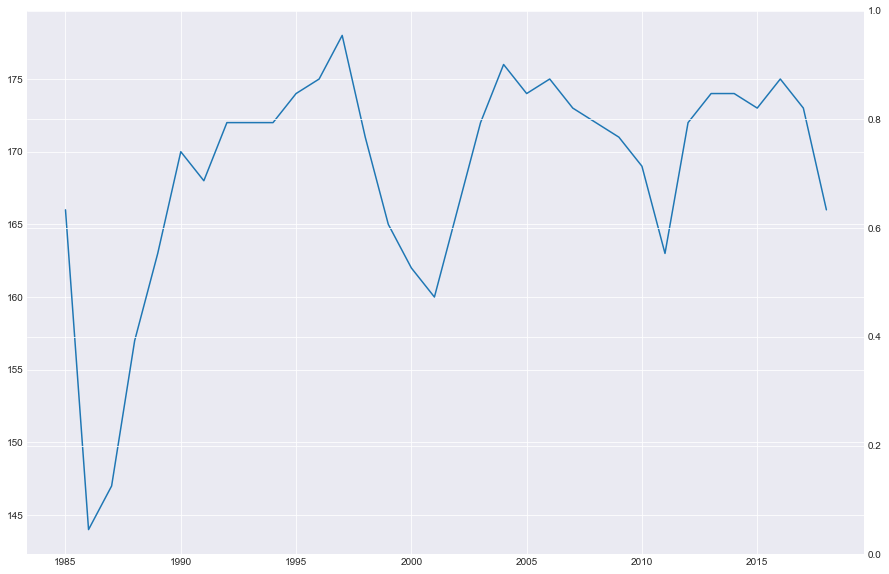

In [26]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years, categories)
ax2.plot(years, fold_change, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax2.set_ylabel('Number of Topics covered by Grants', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

# Missing some data somewhere

In [27]:
nih_budget.FY

0     1938
1     1939
2     1940
3     1941
4     1942
5     1943
6     1944
7     1945
8     1946
9     1947
10    1948
11    1949
12    1950
13    1951
14    1952
15    1953
16    1954
17    1955
18    1956
19    1957
20    1958
21    1959
22    1960
23    1961
24    1962
25    1963
26    1964
27    1965
28    1966
29    1967
      ... 
50    1987
51    1988
52    1989
53    1990
54    1991
55    1992
56    1993
57    1994
58    1995
59    1996
60    1997
61    1998
62    1999
63    2000
64    2001
65    2002
66    2003
67    2004
68    2005
69    2006
70    2007
71    2008
72    2009
73    2010
74    2011
75    2012
76    2013
77    2014
78    2016
79    2018
Name: FY, Length: 80, dtype: int64

2015 and 2017 were missing, found info here: https://officeofbudget.od.nih.gov/pdfs/FY19/Approp%20History%20by%20IC%20FY%202000%20-%20FY%202018.pdf
<br>adding in...

In [5]:
labels_2 = "NIDA NIAAA NINR NHGRI NIBIB NIMHD NCRR NCCAM NCATS FIC NLM OD B&F OAR Total"
data_2017_2 = "1090853 483363 150273 528566 357080 289069 NaN 134689 705903 72213 407510 1729783 128863 NaN 34300999"
data_2015_2 = "1028614 447408 140953 499356 330192 269154 NaN 124681 635230 67786 336939 1413734 128863 NaN 30311349"

In [6]:
labels_1 = "FY NCI NHLBI NIDCR NIDDK NINDS NIAID NIGMS NICHD NEI NIEHS NIA NIAMS NIDCD NIMH"
data_2017_1 = "2017 5689329 3206589 425751 2010245 1783654 4906638 2650838 1380295 732618 791610 2048610 557851 436875 1601931"
data_2015_1 = "2015 4950396 2997870 399886 1899681 1605205 4358841 2371476 1286571 684191 744851 1199468 521665 405302 1463036"

In [30]:
nih_budget.columns

Index(['FY', 'NCI', 'NHLBI', 'NIDCR', 'NIDDK', 'NINDS', 'NIAID', 'NIGMS',
       'NICHD', 'NEI', 'NIEHS', 'NIA', 'NIAMS', 'NIDCD', 'NIMH', 'NIDA',
       'NIAAA', 'NINR', 'NHGRI', 'NIBIB', 'NIMHD', 'NCRR', 'NCCAM', 'NCATS',
       'FIC', 'NLM', 'OD', 'B&F', 'OAR', 'Total'],
      dtype='object')

In [7]:
lables_2_list = labels_2.split(" ")
data_2017_2_list = data_2017_2.split(" ")
data_2015_2_list = data_2015_2.split(" ")
labels_1_list = labels_1.split(" ")
data_2017_1_list = data_2017_1.split(" ")
data_2015_1_list = data_2015_1.split(" ")

In [8]:
data_2017 = data_2017_1_list + data_2017_2_list
data_2015 = data_2015_1_list + data_2015_2_list
lables = labels_1_list + lables_2_list

In [9]:
rows = np.array([data_2015, data_2017])

In [34]:
rows

array([['2015', '4950396', '2997870', '399886', '1899681', '1605205',
        '4358841', '2371476', '1286571', '684191', '744851', '1199468',
        '521665', '405302', '1463036', '1028614', '447408', '140953',
        '499356', '330192', '269154', 'NaN', '124681', '635230', '67786',
        '336939', '1413734', '128863', 'NaN', '30311349'],
       ['2017', '5689329', '3206589', '425751', '2010245', '1783654',
        '4906638', '2650838', '1380295', '732618', '791610', '2048610',
        '557851', '436875', '1601931', '1090853', '483363', '150273',
        '528566', '357080', '289069', 'NaN', '134689', '705903', '72213',
        '407510', '1729783', '128863', 'NaN', '34300999']], dtype='<U8')

In [10]:
new_rows = pd.DataFrame(rows, columns = lables)

In [11]:
new_rows_float = new_rows.astype(float)

In [37]:
new_rows_float.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 30 columns):
FY       2 non-null float64
NCI      2 non-null float64
NHLBI    2 non-null float64
NIDCR    2 non-null float64
NIDDK    2 non-null float64
NINDS    2 non-null float64
NIAID    2 non-null float64
NIGMS    2 non-null float64
NICHD    2 non-null float64
NEI      2 non-null float64
NIEHS    2 non-null float64
NIA      2 non-null float64
NIAMS    2 non-null float64
NIDCD    2 non-null float64
NIMH     2 non-null float64
NIDA     2 non-null float64
NIAAA    2 non-null float64
NINR     2 non-null float64
NHGRI    2 non-null float64
NIBIB    2 non-null float64
NIMHD    2 non-null float64
NCRR     0 non-null float64
NCCAM    2 non-null float64
NCATS    2 non-null float64
FIC      2 non-null float64
NLM      2 non-null float64
OD       2 non-null float64
B&F      2 non-null float64
OAR      0 non-null float64
Total    2 non-null float64
dtypes: float64(30)
memory usage: 560.0 bytes


In [12]:
nih_budget_full = nih_budget.append(new_rows_float)

In [13]:
nih_budget_full_sort = nih_budget_full.sort_values("FY")

In [14]:
nih_budget_full_ordered = nih_budget_full_sort.reset_index(drop = True)

In [41]:
nih_budget_full_ordered

,FY,NCI,NHLBI,NIDCR,NIDDK,NINDS,NIAID,NIGMS,NICHD,NEI,...,NIMHD,NCRR,NCCAM,NCATS,FIC,NLM,OD,B&F,OAR,Total
0,1938.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0
1,1939.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,64.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,464.0
2,1940.0,570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,137.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,707.0
3,1941.0,570.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,711.0
4,1942.0,565.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,135.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0
5,1943.0,535.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,743.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1278.0
6,1944.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2735.0
7,1945.0,561.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2274.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2835.0
8,1946.0,549.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2866.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3415.0
9,1947.0,1821.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,6254.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8075.0


In [17]:
nih_budget_1985_complete = nih_budget_full_ordered[nih_budget_full_ordered.FY >= 1985]
nih_budget_1985_complete.reset_index(drop = True, inplace = True)

In [43]:
nih_budget_1985_complete

,FY,NCI,NHLBI,NIDCR,NIDDK,NINDS,NIAID,NIGMS,NICHD,NEI,...,NIMHD,NCRR,NCCAM,NCATS,FIC,NLM,OD,B&F,OAR,Total
0,1985.0,1183806.0,805269.0,100688.0,543576.0,396885.0,370965.0,482260.0,313295.0,181678.0,...,NaN,304025.0,NaN,NaN,11728.0,55910.0,38304.0,21730.0,NaN,5149459.0
1,1986.0,1203369.0,822292.0,98841.0,544858.0,414727.0,366964.0,492630.0,307958.0,186705.0,...,NaN,292523.0,NaN,NaN,11054.0,55322.0,111961.0,14259.0,NaN,5262211.0
2,1987.0,1402837.0,930001.0,117945.0,511124.0,490233.0,545523.0,570916.0,366780.0,216637.0,...,NaN,322860.0,NaN,NaN,11420.0,61838.0,57208.0,31900.0,NaN,6182910.0
3,1988.0,1469327.0,965536.0,126297.0,534733.0,534692.0,638800.0,632676.0,396811.0,224947.0,...,NaN,368153.0,NaN,NaN,15651.0,67910.0,61819.0,47870.0,NaN,6666693.0
4,1989.0,1570349.0,1045509.0,130709.0,559494.0,472292.0,740257.0,682213.0,425375.0,231170.0,...,NaN,358076.0,NaN,NaN,15790.0,73731.0,72076.0,38492.0,NaN,7144765.0
5,1990.0,1634332.0,1072354.0,135749.0,581477.0,490409.0,832977.0,681782.0,442914.0,236533.0,...,NaN,353734.0,NaN,NaN,15516.0,81861.0,107419.0,61042.0,NaN,7576352.0
6,1991.0,1714784.0,1126942.0,148918.0,615272.0,541743.0,906251.0,760010.0,478956.0,253241.0,...,NaN,335255.0,NaN,NaN,17519.0,91408.0,95651.0,168687.0,NaN,8274739.0
7,1992.0,1962587.0,1188593.0,158417.0,658925.0,577938.0,959082.0,816844.0,518251.0,268978.0,...,NaN,314213.0,NaN,NaN,19593.0,99088.0,141854.0,103840.0,NaN,8921687.0
8,1993.0,1981351.0,1214793.0,161301.0,681342.0,600078.0,979471.0,832581.0,527788.0,276188.0,...,NaN,312468.0,NaN,NaN,19733.0,113031.0,190325.0,108731.0,NaN,10335996.0
9,1994.0,2082267.0,1277880.0,169520.0,716054.0,630650.0,1065593.0,875511.0,555195.0,290260.0,...,NaN,331915.0,NaN,NaN,21677.0,119981.0,233605.0,111039.0,NaN,10955783.0


In [18]:
fold_change_complete_budget = []
totals = nih_budget_1985_complete.Total.tolist()
l = len(totals)-1
for i in list(range(len(totals))):
    if i != l:
        FC = (totals[i+1] - totals[i])/totals[i]
        fold_change_complete_budget.append(FC)

In [45]:
fold_change_categories = []
l = len(categories)-1
for i in list(range(len(categories))):
    if i != l:
        FC = (categories[i+1] - categories[i])/categories[i]
        fold_change_categories.append(FC)

In [46]:
len(fold_change_categories)

33

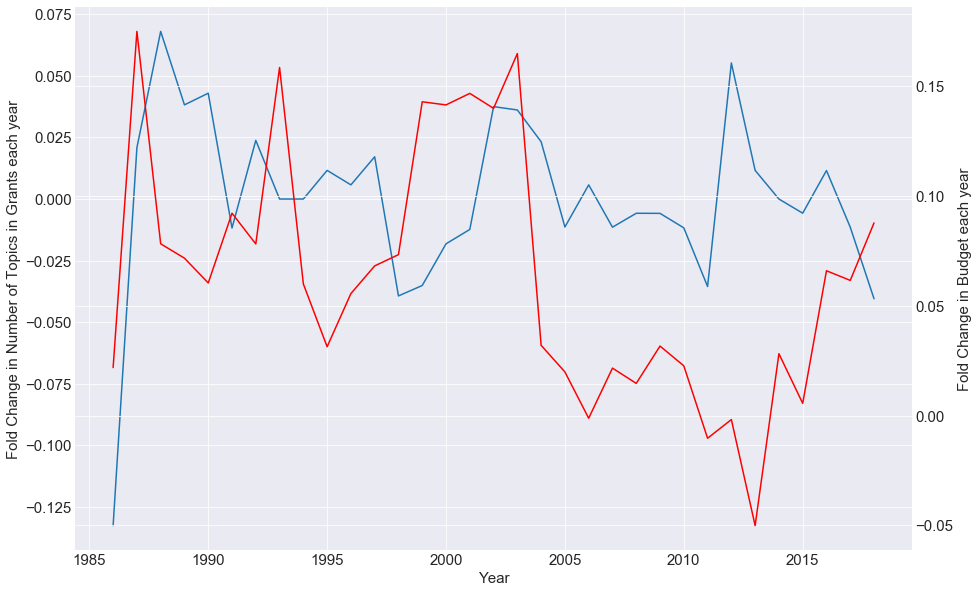

In [47]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years[1:], fold_change_categories)
ax2.plot(years[1:], fold_change_complete_budget, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Fold Change in Number of Topics in Grants each year', fontsize = 15)
ax2.set_ylabel('Fold Change in Budget each year', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [48]:
fold_change_complete_budget

[0.02189589236461539,
 0.1749642878250226,
 0.0782451952236083,
 0.07171051674345887,
 0.06040604554523487,
 0.09217985120015543,
 0.07818349315911959,
 0.1585248395286676,
 0.059963935744557176,
 0.03137511942323064,
 0.055581112192179455,
 0.06818501551280974,
 0.07330755115654435,
 0.1429130118715074,
 0.14149394887350283,
 0.14674231290708092,
 0.1399329454141338,
 0.16488443952421,
 0.032021243643186155,
 0.019892906518319767,
 -0.0011869474805815707,
 0.021641385698255036,
 0.014687730392209278,
 0.031682567711023076,
 0.022684556454852428,
 -0.010296914014981753,
 -0.001792967441655862,
 -0.050066276393054214,
 0.02820425775541958,
 0.005596587665989454,
 0.0659818868503675,
 0.061577435222528155,
 0.0877627500003717]

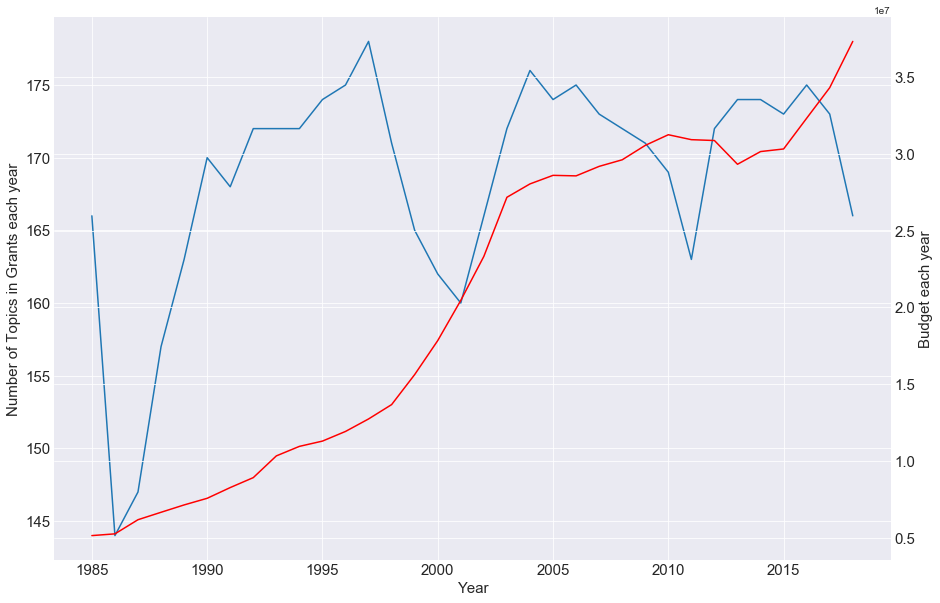

In [50]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years, categories)
ax2.plot(years, totals, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Topics in Grants each year', fontsize = 15)
ax2.set_ylabel('Budget each year', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

# This is the big picture graph, but difficult to understand. What I see is that funding increased at a rate resembling exponential from 1985 to 2003. After that it increased at a much slower rate through 2015. From 2015 to current funding has increast at a rate similar to pre-2003. Number of topics tracks somewhat. Big drop from 1985 to 1986 is confusing and drop from 1997 to 2001 is also confusing. From 2004 to 2011 number of topics decreased, which tracks with lower increase in funding rate. From 2011 to 2012 topics tick up, which i'm not sure why, but then levels off again. I would predict an increase in number of topics over the next few years since funding has increased from 2015.

# Other questions:
### How many grants were submitted each year?
- Use success rate to back propagate to number of grants submitted

### How does each institute compare to NIH total?
- Group by institute and compare to total
- Do for funding, number of topics, and success rate

### NIH funding increases but what should it have done to keep up with inflation?
- Compare both with BRDPI.

### How has topic frequency changed over time?
- Most popular topic each year
- Group by year and count frequeny of each topic

In [61]:
# funded_R01_projects_category.FUNDING_ICs.unique().tolist()

['NCRR:741430\\',
 'NCRR:1811959\\',
 'NCRR:1431792\\',
 'NCRR:1908805\\',
 'NCRR:2067808\\',
 'NCRR:3672199\\',
 'NCRR:160000\\',
 'NCRR:1836100\\',
 'NCRR:1836099\\',
 'NCI:948182\\NCRR:1157783\\NIBIB:711136\\',
 'NCRR:443694\\',
 'NCRR:646243\\',
 'NCRR:149587\\',
 'NCRR:485950\\',
 'NCRR:505388\\',
 'NCRR:28171\\',
 'NCRR:169026\\',
 'NCRR:79161\\',
 'NCRR:56342\\',
 'NCRR:57845\\',
 'NCRR:39087\\',
 'NCRR:1225753\\',
 'NCRR:264537\\',
 'NCRR:1058148\\',
 'NCRR:1059513\\',
 'NCRR:50000\\',
 'NCRR:221903\\',
 'NCRR:63975\\',
 'NCRR:823635\\',
 'NCRR:56918\\',
 'NCRR:649920\\',
 'NCRR:1295311\\',
 'NCRR:270446\\',
 'NCRR:1081783\\',
 'NCRR:1000578\\',
 'NCRR:3079187\\',
 'OD:504784\\',
 'NCRR:716799\\',
 'NCRR:716793\\',
 'NCRR:548786\\',
 'NCRR:878828\\',
 'NCRR:136697\\',
 'NCRR:203105\\',
 'NCRR:1506427\\',
 'NCRR:572989\\',
 'NCRR:657024\\',
 'NCRR:1264281\\',
 'NCRR:47281\\',
 'NCRR:175063\\NIDDK:679699\\',
 'NCRR:902043\\',
 'NCRR:245036\\NIDDK:679700\\',
 'NCRR:972017\\',
 'NC

In [86]:
# funded_R01_projects_category.FUNDING_ICs = funded_R01_projects_category.FUNDING_ICs.str.replace(r":[0-9]+\\", " ").fillna("missing")

In [87]:
# Start with looking at each institute

#nigms = funded_R01_projects_category[funded_R01_projects_category.FUNDING_ICs.str.contains("NIGMS")]

In [88]:
#nigms.head()

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num,category,probability
134,9627164,N,2/24/2018,7/31/2018,1/1/2018,859.0,R01GM106443,136380.0,SCHOOLS OF ARTS AND SCIENCES,PA-16-285,...,Development and application of QM/MM methods f...,MSFD,NaN,NaN,224443.0,NaN,DESCRIPTION (provided by applicant): Metalloen...,R01GM106443,Bioengineering,0.999992
158,9618364,N,2/20/2018,1/31/2019,2/1/2018,859.0,R01GM113001,62648.0,SCHOOLS OF ARTS AND SCIENCES,PA-16-288,...,Regulation of sex-specific gonad stem cell nic...,CMIR,NaN,S1,102520.0,NaN,From parent R01 ? R01GM113001 Project Summary ...,R01GM113001,Infertility,1.000000
165,9619165,N,2/20/2018,8/31/2018,9/1/2017,859.0,R01GM120107,50000.0,SCHOOLS OF MEDICINE,PA-16-287,...,Administrative Supplement to R01GM120107- Fund...,NaN,NaN,S1,50000.0,NaN,Abstract Adult stem cells regenerate tissue by...,R01GM120107,Regenerative Medicine,1.000000
170,9424072,N,2/20/2018,1/31/2019,2/20/2018,859.0,R01GM126035,200000.0,SCHOOLS OF MEDICINE,PA-16-160,...,Inherent mechanisms that govern centrosome fun...,NCSD,NaN,NaN,297266.0,NaN,PROJECT SUMMARY/ABSTRACT There is a fundamenta...,R01GM126035,Genetics,1.000000
186,9529976,N,11/14/2017,1/31/2018,9/1/2017,859.0,R01GM117141,63753.0,SCHOOLS OF ARTS AND SCIENCES,PA-16-285,...,Structural and functional basis for protein-ba...,MSFB,NaN,NaN,98817.0,NaN,? DESCRIPTION (provided by applicant): Tran...,R01GM117141,Gene Therapy,0.999893


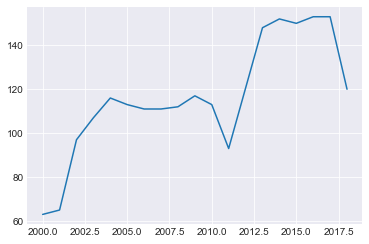

In [95]:
years_nigms = []
categories_nigms = []
for year in np.sort(nigms.FY.unique()):
    df_year = nigms[nigms.FY == year]
    num_categories = len(df_year.category.unique())
    categories_nigms.append(num_categories)
    years_nigms.append(year)
plt.plot(years_nigms, categories_nigms);

In [100]:
nih_budget_1985_complete.columns

Index(['FY', 'NCI', 'NHLBI', 'NIDCR', 'NIDDK', 'NINDS', 'NIAID', 'NIGMS',
       'NICHD', 'NEI', 'NIEHS', 'NIA', 'NIAMS', 'NIDCD', 'NIMH', 'NIDA',
       'NIAAA', 'NINR', 'NHGRI', 'NIBIB', 'NIMHD', 'NCRR', 'NCCAM', 'NCATS',
       'FIC', 'NLM', 'OD', 'B&F', 'OAR', 'Total'],
      dtype='object')

In [105]:
funded_R01_projects_category.FUNDING_ICs.unique()

array(['NCRR ', 'NCI NCRR NIBIB ', 'OD ', 'NCRR NIDDK ',
       'NCRR NHLBI NIAID ', 'NCRR NIAID NIMH ', 'NCRR OD ',
       'NCRR NIAMS OD ', 'NIDCR ', 'NCCIH ', 'NIDDK ', 'NHLBI ', 'NICHD ',
       'NCI ', 'NIMH ', 'NIBIB ', 'NIAID ', 'NIGMS ', 'NINDS ', 'NEI ',
       'NIDA ', 'NIAMS ', 'NIA ', 'NINR ', 'NIMHD ', 'NIEHS ', 'NIAAA ',
       'NIDCD ', 'NHGRI ', 'NEI NIBIB ', 'FDA ', 'missing', 'NIAAA OD ',
       'NIA NINDS ', 'NIAID NICHD ', 'NIDCD NIGMS ', 'NCI NIAID ',
       'NCI NIAID NIBIB NINDS OD ', 'NIDDK OD ', 'NINR OD ',
       'NCMHD NIDA ', 'NIA OD ', 'NCCAM ', 'NIA NIMH ', 'NCRR NIA NINR ',
       'NIAID NIMH ', 'NIAMS OD ', 'NIAID NIAMS ', 'NIAID NIAMS OD ',
       'NCCAM OD ', 'NCI NIDDK ', 'NCI OD ', 'NCIPC ', 'NIDA OD ',
       'NEI NINDS ', 'NEI NIAAA NIDA ', 'NIBIB OD ',
       'NCI NIBIB NIDDK NIMH ', 'NIEHS OD ', 'NICHD NIEHS OD ', 'NEI OD ',
       'NCRR NIGMS OD ', 'NIGMS OD ', 'NCI NIGMS ', 'NICHD OD ',
       'NICHD NIMH ', 'FIC NICHD ', 'NHLBI NICHD OD ', 'NH

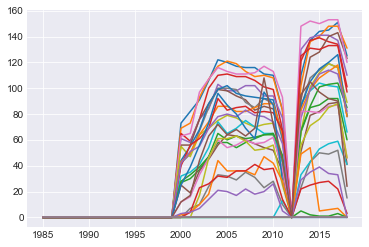

In [111]:
for institute in nih_budget_1985_complete.columns[1:-1]:
    #print(institute)
    df = funded_R01_projects_category[funded_R01_projects_category.FUNDING_ICs.str.contains(institute+" ")]
    #print(df.FUNDING_ICs.head())
    funding_years = df.FY.unique()
    categories_institute = []
    for year in years:
        if year in funding_years:
            #print("in there")
            df_year = df[df.FY == year]
            num_categories = len(df_year.category.unique())
            #print(num_categories)
            categories_institute.append(num_categories)
        else:
            #print("not there")
            categories_institute.append(np.nan)
    plt.plot(years, categories_institute);

In [116]:
funded_R01_projects_category.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645439 entries, 0 to 322718
Data columns (total 40 columns):
APPLICATION_ID            645439 non-null int64
ARRA_FUNDED               250933 non-null object
AWARD_NOTICE_DATE         613697 non-null object
BUDGET_END                643970 non-null object
BUDGET_START              643966 non-null object
CFDA_CODE                 619578 non-null float64
CORE_PROJECT_NUM          645439 non-null object
DIRECT_COST_AMT           165268 non-null float64
ED_INST_TYPE              525890 non-null object
FOA_NUMBER                283080 non-null object
FULL_PROJECT_NUM          645439 non-null object
FUNDING_ICs               411130 non-null object
FUNDING_MECHANISM         250933 non-null object
FY                        645439 non-null float64
INDIRECT_COST_AMT         163655 non-null float64
NIH_SPENDING_CATS         227784 non-null object
ORG_CITY                  644419 non-null object
ORG_DEPT                  436772 non-null object
ORG_

In [118]:
# now i'm worried a little bit
funded_R01_projects_category.grant_num.tail()

322714    P30NR010677
322715    P30NR010677
322716    P30NR010677
322717    P30NR010680
322718    P30NR010680
Name: grant_num, dtype: object

# It appears some extra grant types snuck in because of combination of IC code and serial number (like P30NR01... <-- this isn't actually an R01). Go back to original DF, find those rows and remove them from new DF with categories attached. Also next time don't be so dumb dummie!

In [15]:
nih_full = pd.read_csv("data/nih_full.csv")

/Users/maheshrao/anaconda3/envs/capstone/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (5,6,9,15,16,17,21,24,26,31,32,35,40,44,45,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [120]:
nih_full.columns

Index(['Unnamed: 0', 'ACTIVITY', 'ADMINISTERING_IC', 'APPLICATION_ID',
       'APPLICATION_TYPE', 'ARRA_FUNDED', 'AWARD_NOTICE_DATE', 'BUDGET_END',
       'BUDGET_START', 'CFDA_CODE', 'CORE_PROJECT_NUM', 'DIRECT_COST_AMT',
       'ED_INST_TYPE', 'FOA_NUMBER', 'FULL_PROJECT_NUM', 'FUNDING_ICs',
       'FUNDING_Ics', 'FUNDING_MECHANISM', 'FY', 'IC_NAME',
       'INDIRECT_COST_AMT', 'NIH_SPENDING_CATS', 'ORG_CITY', 'ORG_COUNTRY',
       'ORG_DEPT', 'ORG_DISTRICT', 'ORG_DUNS', 'ORG_FIPS', 'ORG_IPF_CODE',
       'ORG_NAME', 'ORG_STATE', 'ORG_ZIPCODE', 'PHR', 'PI_IDS', 'PI_NAMEs',
       'PROGRAM_OFFICER_NAME', 'PROJECT_END', 'PROJECT_START', 'PROJECT_TERMS',
       'PROJECT_TITLE', 'SERIAL_NUMBER', 'STUDY_SECTION', 'STUDY_SECTION_NAME',
       'SUBPROJECT_ID', 'SUFFIX', 'SUPPORT_YEAR', 'TOTAL_COST',
       'TOTAL_COST_SUB_PROJECT', 'Unnamed: 0.1'],
      dtype='object')

In [16]:
nih_full.drop(nih_full[nih_full.APPLICATION_ID.isnull()].index, inplace = True)#[nih_full.FULL_PROJECT_NUM.str.contains("R01", na = "missing")]#[["ACTIVITY", "ADMINISTERING_IC", "APPLICATION_TYPE", "FULL_PROJECT_NUM", "FUNDING_ICs", "FUNDING_Ics", "IC_NAME"]]

In [17]:
nih_full.drop(nih_full[nih_full.FULL_PROJECT_NUM.isnull()].index, inplace = True)

In [18]:
nih_full.APPLICATION_ID = nih_full.APPLICATION_ID.astype(int)

In [19]:
non_R01_ids = nih_full[(nih_full.FULL_PROJECT_NUM.str.contains("R01")) & (nih_full.ACTIVITY != "R01")].APPLICATION_ID.tolist()

In [20]:
funded_R01_application_ids = funded_R01_projects_category.APPLICATION_ID.tolist()

In [21]:
ids_to_remove = list(set(funded_R01_application_ids) & set(non_R01_ids))

In [160]:
ids_to_remove

[9469952,
 6225923,
 7929859,
 7897100,
 6946828,
 7470293,
 8716307,
 7515884,
 8912917,
 8618009,
 8716323,
 6946858,
 7561479,
 7438381,
 6421723,
 7561480,
 7274552,
 8473287,
 8290364,
 7897149,
 7405628,
 8069489,
 6916708,
 6946894,
 6946900,
 6881365,
 6946902,
 8069494,
 7602268,
 7602269,
 7602270,
 7602271,
 7602272,
 7602273,
 7602274,
 7602275,
 7602276,
 7503964,
 7602278,
 7602279,
 7602280,
 7602281,
 7602282,
 6684779,
 6946920,
 7602285,
 7602286,
 7602287,
 7602283,
 7602289,
 7602290,
 7602291,
 7209076,
 7602292,
 7602293,
 7602295,
 7602294,
 7602296,
 7602297,
 7602298,
 7602299,
 7602300,
 7602301,
 7602302,
 7602304,
 7602305,
 7602306,
 7602307,
 7602308,
 7602309,
 7602310,
 7602311,
 7602303,
 7602313,
 7602314,
 7602315,
 7602316,
 7602317,
 7602318,
 7602319,
 7602320,
 7602321,
 7602322,
 7602323,
 7602324,
 7602325,
 7602326,
 7602327,
 7602328,
 7602329,
 7602330,
 7602331,
 7602332,
 7602333,
 7602334,
 7602335,
 7602336,
 7602337,
 7602338,
 7602339,


In [163]:
nih_full[(nih_full.APPLICATION_ID.isin(ids_to_remove))].FULL_PROJECT_NUM

712          1R21NR014318-01A1
1282           5R03NR013966-02
1384           5F31NR013612-02
2305           1T32NR014833-01
2388           5K01NR013437-03
2463           5F31NR014061-02
3139           1R41NR015191-01
3613           1P30NR015326-01
3629           5K99NR014675-02
4043           5K23NR013475-03
4223         1R03NR013236-01A1
4681           1P20NR015331-01
4786           5K99NR014587-02
6592         1K23NR014951-01A1
7293           5F31NR013596-02
7637           1R03NR014915-01
10527          5F31NR014598-02
10877          5T32NR011972-05
11783          1F31NR014952-01
11876          5F31NR014609-02
11992          1P20NR015331-01
12290          1F31NR015172-01
12807          5R03NR013961-02
12921        1R21NR014349-01A1
13182          5T32NR012715-03
13186          4R00NR013548-03
13387          2R44NR013853-02
14182        1R21NR013737-01A1
14602        1R21NR013471-01A1
15938          5R21NR014055-02
                  ...         
2309530        5U54RR019192-06
2309531 

In [22]:
funded_R01_projects_category_cleaned = funded_R01_projects_category[~funded_R01_projects_category.APPLICATION_ID.isin(ids_to_remove)].reset_index(drop = True)

In [183]:
funded_R01_projects_category_cleaned.head()

,APPLICATION_ID,ARRA_FUNDED,AWARD_NOTICE_DATE,BUDGET_END,BUDGET_START,CFDA_CODE,CORE_PROJECT_NUM,DIRECT_COST_AMT,ED_INST_TYPE,FOA_NUMBER,...,PROJECT_TITLE,STUDY_SECTION,SUBPROJECT_ID,SUFFIX,TOTAL_COST,TOTAL_COST_SUB_PROJECT,ABSTRACT_TEXT,grant_num,category,probability
0,9524509,N,2/20/2018,1/31/2019,2/1/2018,121.0,R01DE027538,237500.0,SCHOOLS OF ARTS AND SCIENCES,PA-16-160,...,Cell lineage and transcriptional analysis of t...,DEV2,NaN,A1,391875.0,NaN,"Bronner, M.E. In the early embryo, the neural...",R01DE027538,Genetics,0.999933
1,9617136,N,2/23/2018,5/31/2018,2/1/2018,213.0,R01AT009263,231622.0,BIOMED ENGR/COL ENGR/ENGR STA,PA-16-285,...,Mind-body awareness training and brain-compute...,NOIT,NaN,NaN,343785.0,NaN,Summary Brain-computer interface (BCI) tec...,R01AT009263,Bipolar Disorder,1.000000
2,9414027,N,2/19/2018,1/31/2019,2/1/2018,847.0,R01DK030534,202500.0,SCHOOLS OF MEDICINE,PA-13-302,...,Factors Regulating the Cellular Uptake of Iron,MCH,NaN,NaN,301725.0,NaN,? DESCRIPTION (provided by applicant): Iron...,R01DK030534,Digestive Diseases,1.000000
3,9417045,N,2/22/2018,1/31/2019,2/1/2018,837.0,R01HL122843,469823.0,SCHOOLS OF MEDICINE,PA-13-302,...,Molecular mechanisms linking the CXCL12 pathwa...,CICS,NaN,NaN,673565.0,NaN,DESCRIPTION (provided by applicant): Genome-wi...,R01HL122843,Heart Disease - Coronary Heart Disease,1.000000
4,9463193,N,2/19/2018,1/31/2019,2/16/2018,865.0,R01HD094381,445033.0,SCHOOLS OF MEDICINE,RFA-HD-18-003,...,Applying Diffusion Basis Spectrum Imaging to C...,ZHD1,NaN,NaN,649905.0,NaN,Summary/Abstract An important cause of preterm...,R01HD094381,Pediatric,1.000000


# Now redo some graphs...eyeroll

In [27]:
R01s_per_year_cleaned = funded_R01_projects_category_cleaned.groupby("FY").count()

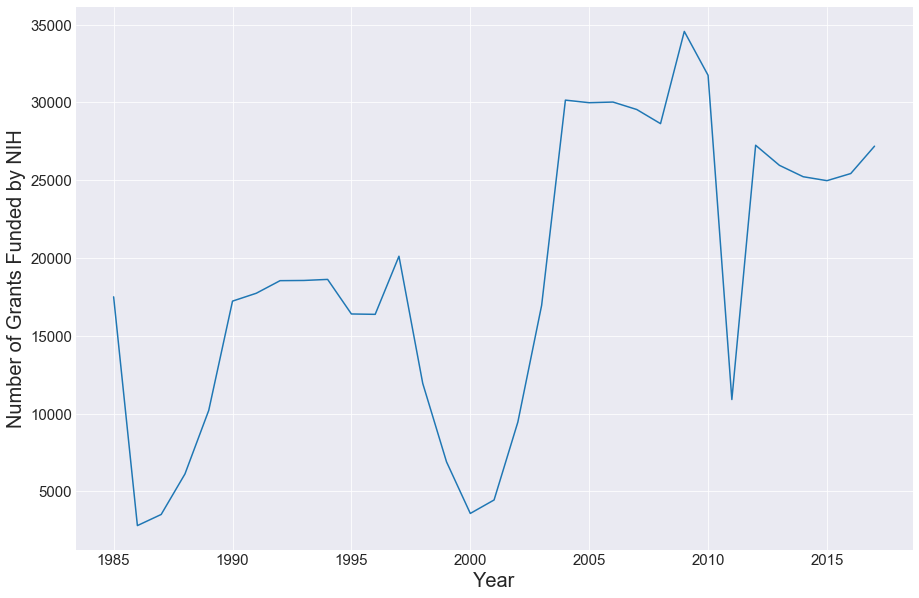

In [28]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.set_style("darkgrid")
plt.plot(R01s_per_year_cleaned.loc[R01s_per_year_cleaned.index != 2018.0]["grant_num"])
plt.xlabel("Year", size = 20)
plt.ylabel("Number of Grants Funded by NIH", size = 20)
ax.tick_params(axis='both', labelsize = 15)
plt.show();

In [29]:
years_cleaned = []
categories_cleaned = []
for year in np.sort(funded_R01_projects_category_cleaned.FY.unique()):
    df_year = funded_R01_projects_category_cleaned[funded_R01_projects_category_cleaned.FY == year]
    num_categories = len(df_year.category.unique())
    categories_cleaned.append(num_categories)
    years_cleaned.append(year)

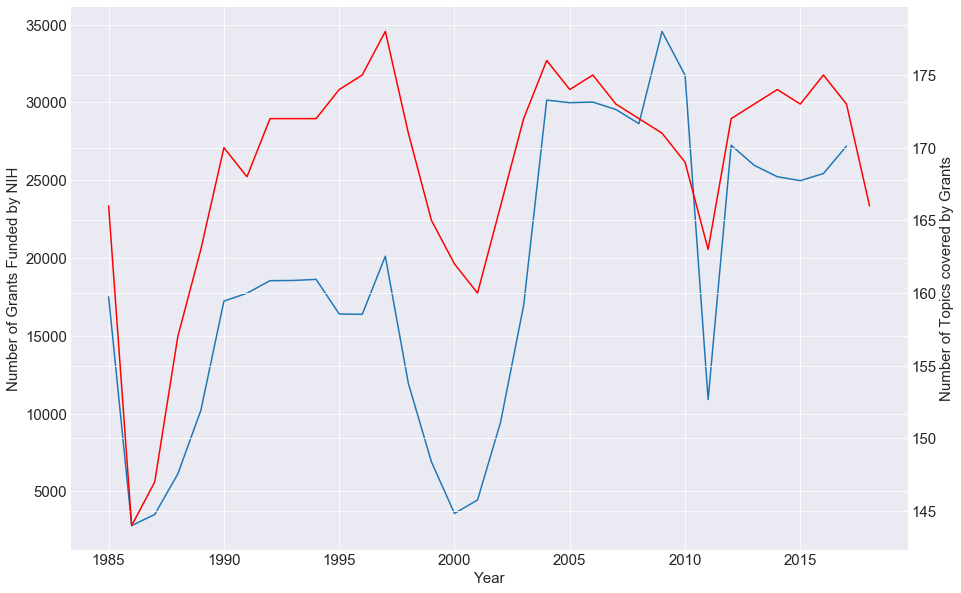

In [30]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(R01s_per_year_cleaned.loc[R01s_per_year_cleaned.index != 2018.0]["grant_num"])
ax2.plot(years_cleaned, categories_cleaned, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Grants Funded by NIH', fontsize = 15)
ax2.set_ylabel('Number of Topics covered by Grants', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

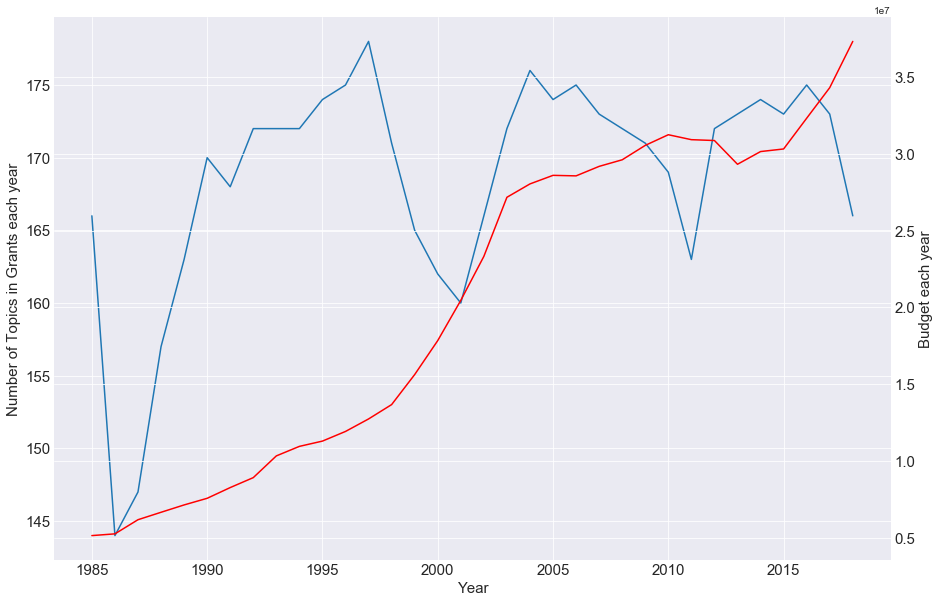

In [31]:
fig, ax = plt.subplots(figsize=(15, 10))
ax2 = ax.twinx()
ax.plot(years_cleaned, categories_cleaned)
ax2.plot(years_cleaned, totals, color = "red")
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Topics in Grants each year', fontsize = 15)
ax2.set_ylabel('Budget each year', fontsize = 15)
ax.tick_params(axis='both', labelsize = 15)
ax2.tick_params(labelsize = 15);

In [195]:
funded_R01_projects_category_cleaned.grant_num.head()

0    R01DE027538
1    R01AT009263
2    R01DK030534
3    R01HL122843
4    R01HD094381
Name: grant_num, dtype: object

In [32]:
funded_R01_projects_category_cleaned["ic_code"] = funded_R01_projects_category_cleaned.grant_num.str.extract(r"([A-Z]{2})")

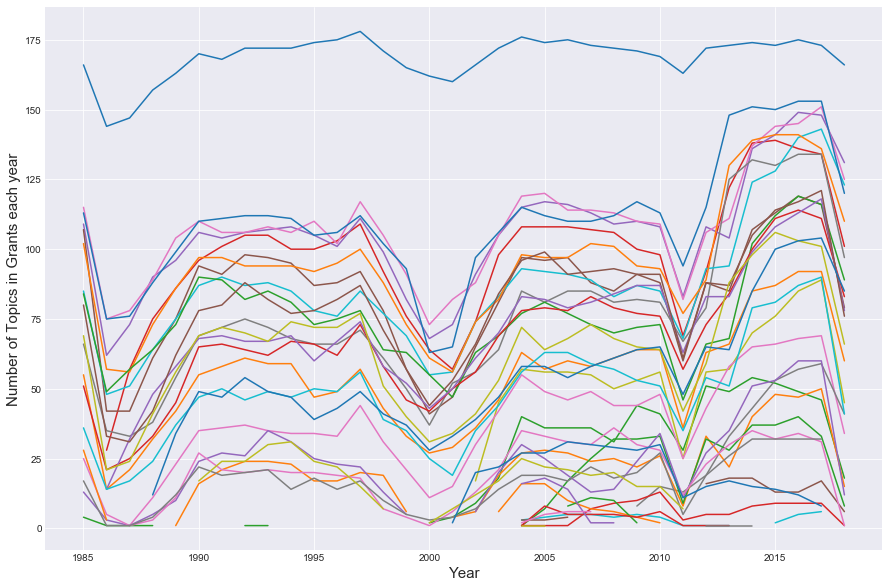

In [33]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(years_cleaned, categories_cleaned)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Number of Topics in Grants each year', fontsize = 15)
for institute in funded_R01_projects_category_cleaned["ic_code"].unique():
    #print(institute)
    df = funded_R01_projects_category_cleaned[funded_R01_projects_category_cleaned.ic_code == institute]
    #print(df.FUNDING_ICs.head())
    funding_years = df.FY.unique()
    categories_institute = []
    for year in years_cleaned:
        if year in funding_years:
            #print("in there")
            df_year = df[df.FY == year]
            num_categories = len(df_year.category.unique())
            #print(num_categories)
            categories_institute.append(num_categories)
        else:
            #print("not there")
            categories_institute.append(np.nan)
    ax.plot(years_cleaned, categories_institute);

In [38]:
inflation = pd.read_excel("data/SeriesReport-20180718142529_be797a.xlsx", skiprows=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12])

In [39]:
inflation.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,HALF1,HALF2
0,1986,4.4,4.2,4.1,4.2,4.0,4.0,4.1,4.0,4.1,4.0,3.8,3.8,4.0,4.1,4.0
1,1987,3.8,3.8,4.0,4.2,4.2,4.1,4.0,4.2,4.3,4.3,4.4,4.2,4.1,4.0,4.2
2,1988,4.3,4.3,4.4,4.3,4.3,4.5,4.5,4.4,4.4,4.5,4.4,4.7,4.4,4.4,4.5
3,1989,4.6,4.8,4.7,4.6,4.6,4.5,4.6,4.4,4.3,4.3,4.4,4.4,4.5,4.6,4.3
4,1990,4.4,4.6,4.9,4.8,4.8,4.9,5.0,5.5,5.5,5.3,5.3,5.2,5.0,4.8,5.3


In [40]:
inflation_per_year = inflation.Annual.tolist()[:-1]

In [41]:
nih_budget_in_1985 = nih_budget_1985.Total.iloc[0]

In [42]:
projected_budgets = [nih_budget_in_1985]
for i in inflation_per_year:
    projected_budgets.append(projected_budgets[-1] * i)

In [43]:
nih_budget_in_1985*inflation_per_year[0]*inflation_per_year[1]*inflation_per_year[2]

371584961.44

In [1]:
projected_budgets

NameError: name 'projected_budgets' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))
plt.plot(years_cleaned[:-1], projected_budgets)
plt.plot(years_cleaned[:-1], totals[:-1], color = "red")
# plt.yscale("log")
# plt.xlabel('Year', fontsize = 15)
# plt.ylabel('Number of Grants Funded by NIH', fontsize = 15)
# plt.tick_params(axis='both', labelsize = 15)
# plt.text(s = "Increase in Research Cost (BRDPI)", x = 0, y = 0, size = 15);

In [25]:
[funded_R01_projects_category_cleaned_1, funded_R01_projects_category_cleaned_2] = np.array_split(funded_R01_projects_category_cleaned, 2)

df_list = [funded_R01_projects_category_cleaned_1, funded_R01_projects_category_cleaned_2]
df_names = ["funded_R01_projects_category_cleaned_1", "funded_R01_projects_category_cleaned_2"]

for name, df in zip(df_names, df_list):
    df.to_csv('data/funded_R01_projects_category_dfs/{}.csv'.format(name), index = False)

In [ ]:
funded_R01_projects_category_cleaned

In [24]:
nih_budget_full_ordered.to_csv('data/nih_budget_full.csv', index = False)